### Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy
from scipy import stats

In [2]:
df = pd.read_csv('BuyerRatio.csv')
df

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Observed Values  2 non-null      object
 1   East             2 non-null      int64 
 2   West             2 non-null      int64 
 3   North            2 non-null      int64 
 4   South            2 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 208.0+ bytes


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
East,2.0,242.5,272.236111,50.0,146.25,242.5,338.75,435.0
West,2.0,832.5,976.514465,142.0,487.25,832.5,1177.75,1523.0
North,2.0,743.5,866.205807,131.0,437.25,743.5,1049.75,1356.0
South,2.0,410.0,480.832611,70.0,240.00,410.0,580.00,750.0


In [5]:
df.sum()

Observed Values    MalesFemales
East                        485
West                       1665
North                      1487
South                       820
dtype: object

In [6]:
df.var()

East      74112.5
West     953580.5
North    750312.5
South    231200.0
dtype: float64

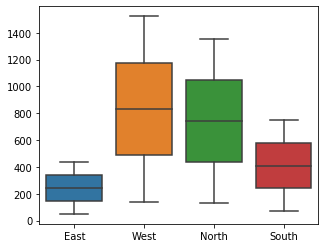

In [7]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df)
plt.show()

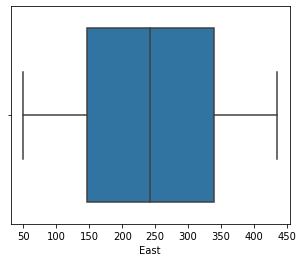

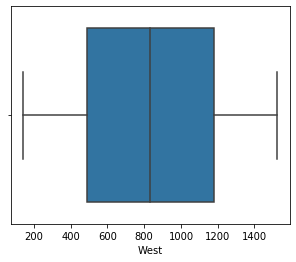

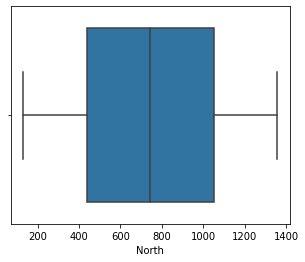

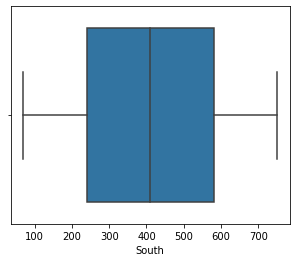

In [8]:
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        plt.figure(figsize=(5,4))
        sns.boxplot(data=df, x=i)
        plt.show()

In [9]:
df.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [10]:
df1 = pd.DataFrame()

In [11]:
df1 = df.iloc[:, 1:]

In [12]:
df1

,East,West,North,South
0,50,142,131,70
1,435,1523,1356,750


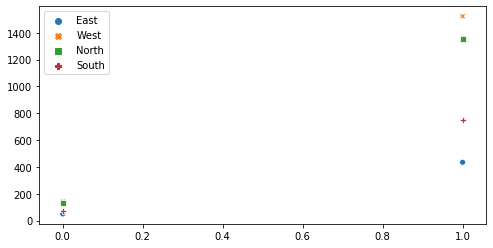

In [13]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df1)
plt.show()

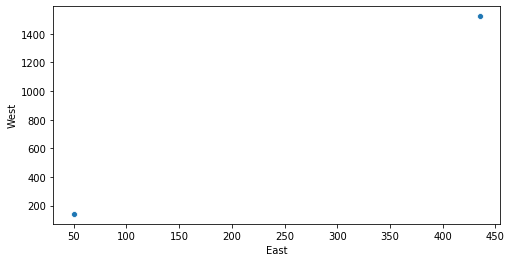

In [14]:
plt.figure(figsize=(8,4))
sns.scatterplot( x='East', y='West', data=df)
plt.show()

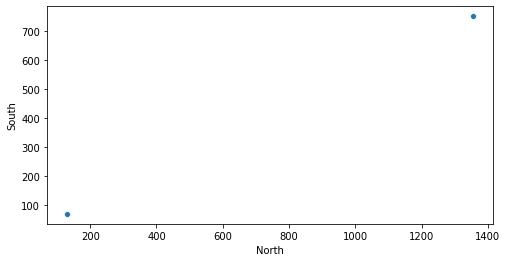

In [15]:
plt.figure(figsize=(8,4))
sns.scatterplot( x='North', y='South', data=df)
plt.show()

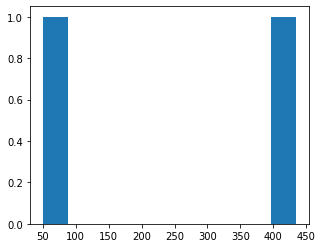

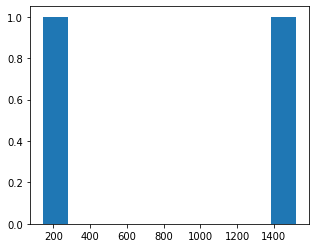

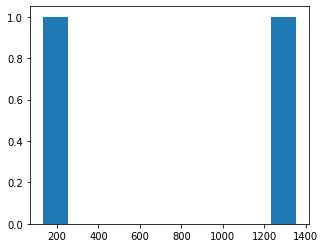

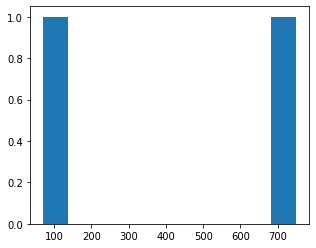

In [16]:
for i in df1.columns:    
    plt.figure(figsize=(5,4))
    plt.hist(x=i, data=df)
    plt.show()

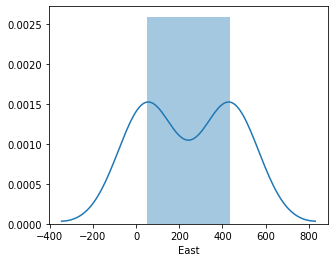

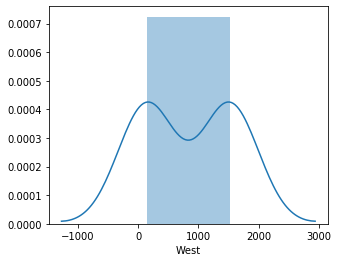

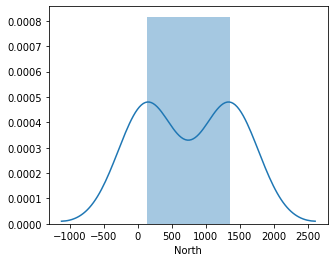

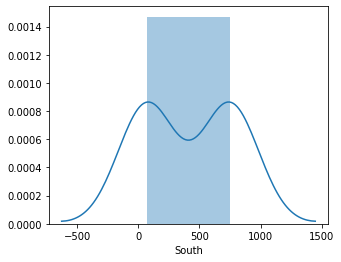

In [17]:
for i in df1.columns:    
    plt.figure(figsize=(5,4))
    sns.distplot(df1[i])
    plt.show()

In [18]:
print(df.iloc[0, 1:].sum(axis=0))
print(df.iloc[1, 1:].sum(axis=0))

393
4064


In [19]:
df.iloc[:,1:]

,East,West,North,South
0,50,142,131,70
1,435,1523,1356,750


In [20]:
df1 = df.iloc[:,1:].values.astype(int)

In [21]:
df1

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]])

In [22]:
stats.chi2_contingency(df1)

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

##### From the given results P value we got is more than 0.05 so Null Hypothesis stays

##### That means Male and Female buyer's ratios are similar across regions.

### For my reference

In [23]:
stats.ttest_ind(df.iloc[0, 1:], df.iloc[1, 1:], equal_var=False)

Ttest_indResult(statistic=-3.5844638979607404, pvalue=0.036242551705127975)

In [24]:
stats.ttest_rel(df.iloc[0, 1:], df.iloc[1, 1:])

Ttest_relResult(statistic=-3.945257398753132, pvalue=0.029035267373345545)

In [25]:
stats.chi2_contingency(df1)

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))